In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import tensorflow as tf
from keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 8
NUM_EPOCH = 10

train_path = "/content/gdrive/My Drive/app/xray/chest_xray/train"
valid_path = "/content/gdrive/My Drive/app/xray/chest_xray/val"

In [4]:
resnet50 = ResNet50(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)
for layer in resnet50.layers:
  layer.trainable = False

folders = glob("/content/gdrive/My Drive/app/xray/chest_xray/train/*")

x = Flatten()(resnet50.output)
prediction  = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet50.input, outputs=prediction)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=BATCH_SIZE, class_mode='categorical')
valid_set = test_datagen.flow_from_directory(valid_path, target_size=(224,224), batch_size=BATCH_SIZE, class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
652/652 [==============================] - 170s 261ms/step - loss: 1.1766 - acc: 0.9149 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
652/652 [==============================] - 166s 254ms/step - loss: 0.7980 - acc: 0.9456 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
652/652 [==============================] - 165s 252ms/step - loss: 0.9385 - acc: 0.9377 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
652/652 [==============================] - 169s 260ms/step - loss: 0.8205 - acc: 0.9465 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
652/652 [==============================] - 160s 246ms/step - loss: 0.8662 - acc: 0.9436 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/10
652/652 [==============================] - 171s 263ms/step - loss: 0.7790 - acc: 0.9494 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/10
652/652 [==============================] - 166s 254ms/step - loss: 0.7943 - acc: 0.9477 - val_loss: 8.0590 - val_acc: 0.5000


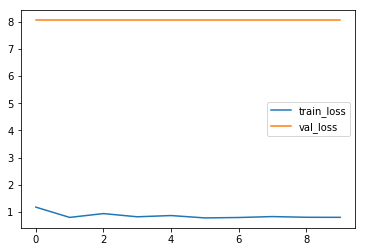

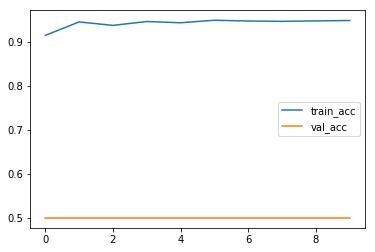

<Figure size 432x288 with 0 Axes>

In [6]:
r=model.fit_generator(training_set, validation_data=valid_set, epochs=NUM_EPOCH, steps_per_epoch=len(training_set), validation_steps=len(valid_set))

plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("/content/gdrive/My Drive/app/xray/resnet50/Lossval_loss")

plt.plot(r.history['acc'], label='train_acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("/content/gdrive/My Drive/app/xray/resnet50/Lossval_acc")

model.save("/content/gdrive/My Drive/app/xray/resnet50/model_resnet50.h5")

Viem Phoi
[[0. 1.]]
0.0
1.0


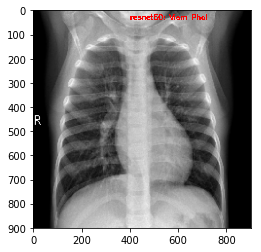

In [9]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import numpy as np
from keras.preprocessing.image import img_to_array
import cv2
import matplotlib.pyplot as plt

model = load_model('/content/gdrive/My Drive/app/xray/resnet50/model_resnet50.h5')
#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg", target_size=(224, 224))
#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg", target_size=(224, 224))

#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/test/PNEUMONIA/person1682_virus_2899.jpeg", target_size=(224, 224))
#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/test/PNEUMONIA/person1629_virus_2823.jpeg", target_size=(224, 224))
#model.summary()
img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/test/NORMAL/NORMAL2-IM-0374-0001.jpeg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

numpy_image = np.uint8(img_to_array(img)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))
label = "Binh Thuong" if classes[0][0] == 1 else "Viem Phoi"
cv2.putText(numpy_image, "resnet50: {}".format(label) , (400, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)

plt.imshow(numpy_image)
plt.savefig('/content/gdrive/My Drive/app/xray/resnet50/test2.png')
print(label)
print(classes)
print(classes[0][0])
print(classes[0][1])